# Using external libraries and getting to grips with documentation

While matplotlib is often the first plotting library people encounter, it's far from the only one! Many libraries, such as seaborn, are build on top of matplotlib (meaning you can use matplotlib functions to change settings), while others are built from the ground up.

Some popular plotting libraries include:
- [seaborn](https://seaborn.pydata.org/)
- [Plotly](https://plotly.com/python/plotly-express/)
- [Vega Altair](https://altair-viz.github.io/)
- [ProPlot](https://proplot.readthedocs.io/en/latest/index.html#)
- [Plotnine](https://plotnine.org/)
- [bokeh](https://bokeh.org/)

Each of these uses slightly different function calls to create plots; and this can feel very overwhelming at first. However, it's also the dieal opportunity to get to grips with using Python documentaiton, because once you understand how to read the docs, implementing new cool libraries becomes an awful lot easier!

## Building plots with seaborn

In the previous session, we used seaborn to set the style of our figure, but we were still using the matplotlb framework to actually create the plot. Lets have another look at what seaborn can do.

You can also look at our detailed course notes on building histograms [here](https://arctraining.github.io/data-vis/04-distribution-histogram.html#assessing-distributions-histograms).

While we are working on these plots, keep the seaborn documentation open and keep checking back and forth how your work aligns with docstrings.

- [seaborn histplots](https://seaborn.pydata.org/generated/seaborn.histplot.html)
- [seaborn displots](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

We can create a bare-bones plot by setting up the `fig` and `ax` as we have done previously, then calling the seaborn `histplot` function. Unlike when we were using matplotlib, we don't prefix `histplot` with `ax` (like `ax.plot`); instead, we pass `histplot` the argument `ax=`. We've called our axes "ax", so we get the slightly silly looking argument `ax=ax`. We will see later in the course how this becomes more relevant when you have a multi-part figure!

In [1]:
# import necessary packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# we're going to use the seaborn penguins dataset again

data = sns.load_dataset("penguins")


In [4]:
# we can use Colab's interactive data table tool to explore our data
data

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

<Axes: xlabel='bill_length_mm', ylabel='Count'>

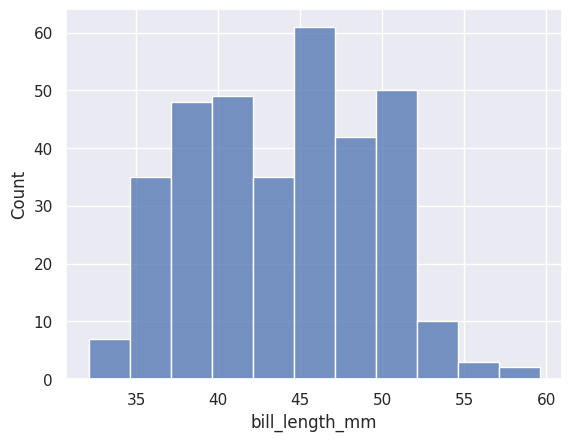

In [7]:
# default seaborn theme
sns.set_theme()

# start the plot the same way as before: by defining the figure and axs objects
fig, ax = plt.subplots()

# now, we can use the seaborn histplot function
sns.histplot(data, x="bill_length_mm", ax=ax)


<Axes: xlabel='bill_length_mm', ylabel='Count'>

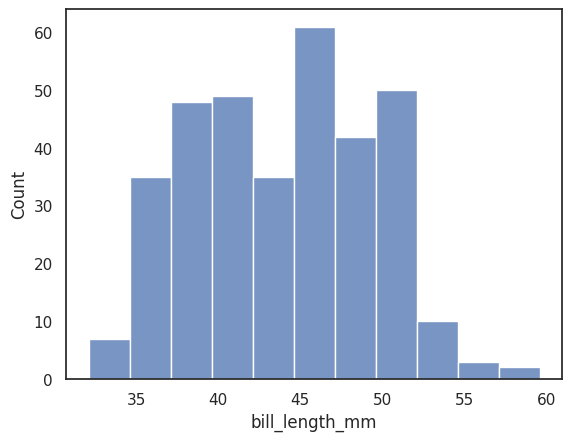

In [10]:
# we can modify the theme
sns.set_theme(style="white", context="notebook",)

# start the plot the same way as before: by defining the figure and axs objects
fig, ax = plt.subplots()

# now, we can use the seaborn histplot function
sns.histplot(data, x="bill_length_mm", ax=ax)


<Axes: xlabel='bill_length_mm', ylabel='Count'>

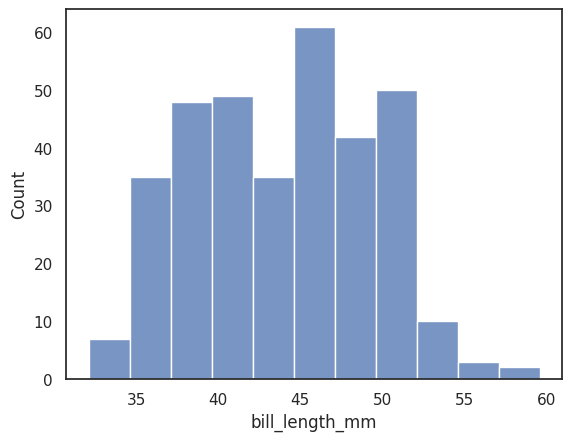

In [12]:
# we can modify the theme
sns.set_theme(style="white", context="notebook",)

# start the plot the same way as before: by defining the figure and axs objects
fig, ax = plt.subplots()

# we can also define the data like this:
sns.histplot(data["bill_length_mm"], ax=ax)

<Axes: ylabel='Count'>

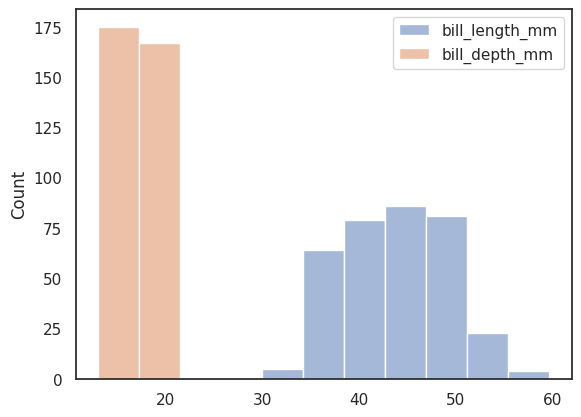

In [14]:
# we can modify the theme
sns.set_theme(style="white", context="notebook",)

# start the plot the same way as before: by defining the figure and axs objects
fig, ax = plt.subplots()

# we can also define multiple distributions
sns.histplot(data[["bill_length_mm", "bill_depth_mm"]], ax=ax)

<Axes: ylabel='Count'>

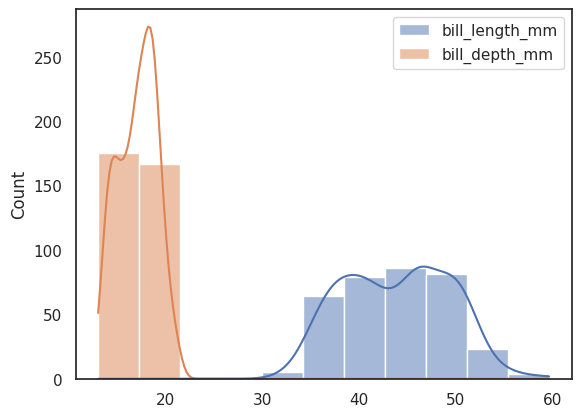

In [16]:
# we can modify the theme
sns.set_theme(style="white", context="notebook",)

# start the plot the same way as before: by defining the figure and axs objects
fig, ax = plt.subplots()

# we can add kde distributions
sns.histplot(data[["bill_length_mm", "bill_depth_mm"]], ax=ax, kde=True)

<Axes: xlabel='bill_length_mm', ylabel='Count'>

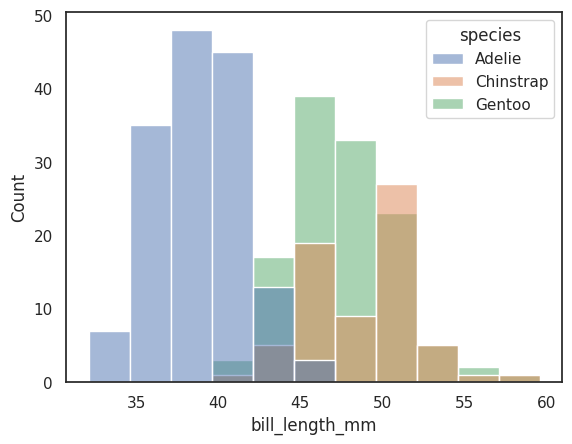

In [15]:
# we can modify the theme
sns.set_theme(style="white", context="notebook",)

# start the plot the same way as before: by defining the figure and axs objects
fig, ax = plt.subplots()

# we can define "hue" to take one of the categorical parameters
sns.histplot(data, x="bill_length_mm", hue="species", ax=ax)

<Axes: xlabel='bill_length_mm', ylabel='Count'>

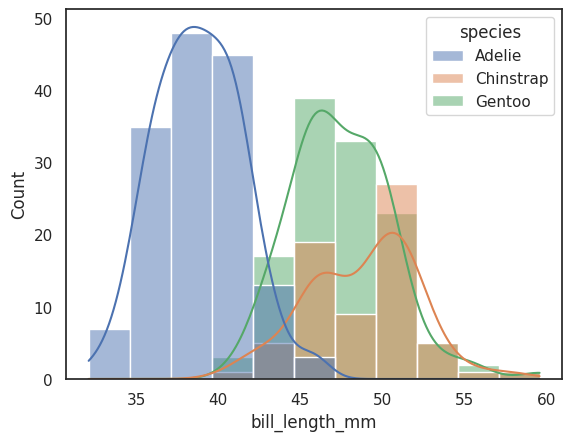

In [17]:
# we can modify the theme
sns.set_theme(style="white", context="notebook",)

# start the plot the same way as before: by defining the figure and axs objects
fig, ax = plt.subplots()

# we can define "hue" to take one of the categorical parameters
# and can add the kde... until it's looking very busy!
sns.histplot(data, x="bill_length_mm", hue="species", ax=ax, kde=True)

We are going to have a look at two different arguments that `histplot` can take that will help us control the appearance of our plot: `multiple` and `element`.

|Argument | `multiple` | `element` |
|--:|:--|:--|
| Default value| `layer` | `bars` |
| Options | `“layer”, “dodge”, “stack”, “fill”`| `“bars”, “step”, “poly”`|

<Axes: xlabel='bill_length_mm', ylabel='Count'>

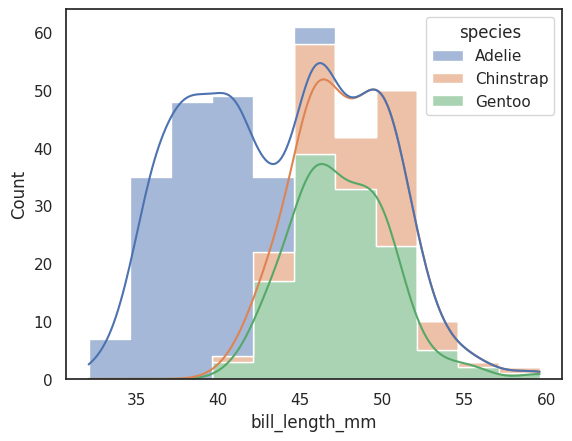

In [19]:
fig, ax = plt.subplots()
sns.histplot(data, x="bill_length_mm", hue="species", ax=ax, kde=True,
             multiple="stack", element="step")

<Axes: xlabel='bill_length_mm', ylabel='Count'>

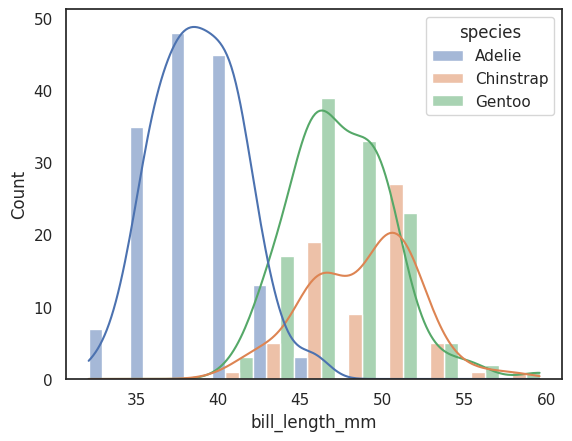

In [20]:
fig, ax = plt.subplots()
sns.histplot(data, x="bill_length_mm", hue="species", ax=ax, kde=True,
             multiple="dodge", element="bars")

<Axes: xlabel='bill_length_mm', ylabel='Count'>

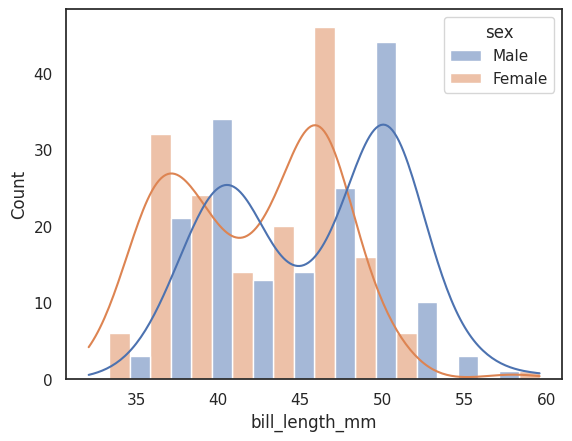

In [21]:
fig, ax = plt.subplots()
sns.histplot(data, x="bill_length_mm", hue="sex", ax=ax, kde=True,
             multiple="dodge", element="bars")

We can control the binwidth and use the shrink parameter to make plots like this more easy to read:

<Axes: xlabel='bill_length_mm', ylabel='Count'>

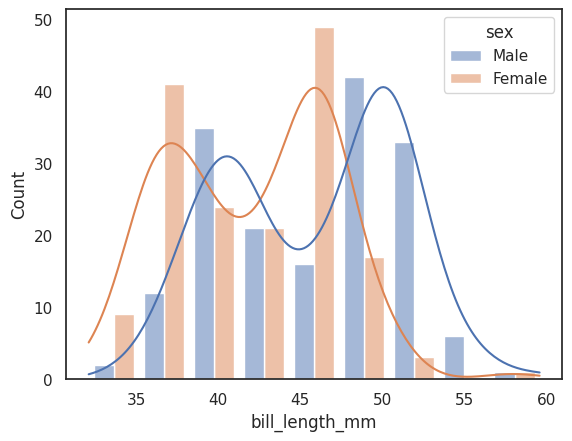

In [25]:
fig, ax = plt.subplots()
sns.histplot(data, x="bill_length_mm", hue="sex", ax=ax, kde=True,
             multiple="dodge", element="bars",
             binwidth=3, shrink=0.8)

But sometimes, we need to split these apart and look at them separately.

For this, we can use the function `displot()`, which is a "figure-level wrapper" around `histplot()` that will do the work of organising different panels behind the scenes - much like the pyplot method of using matlpotlib.





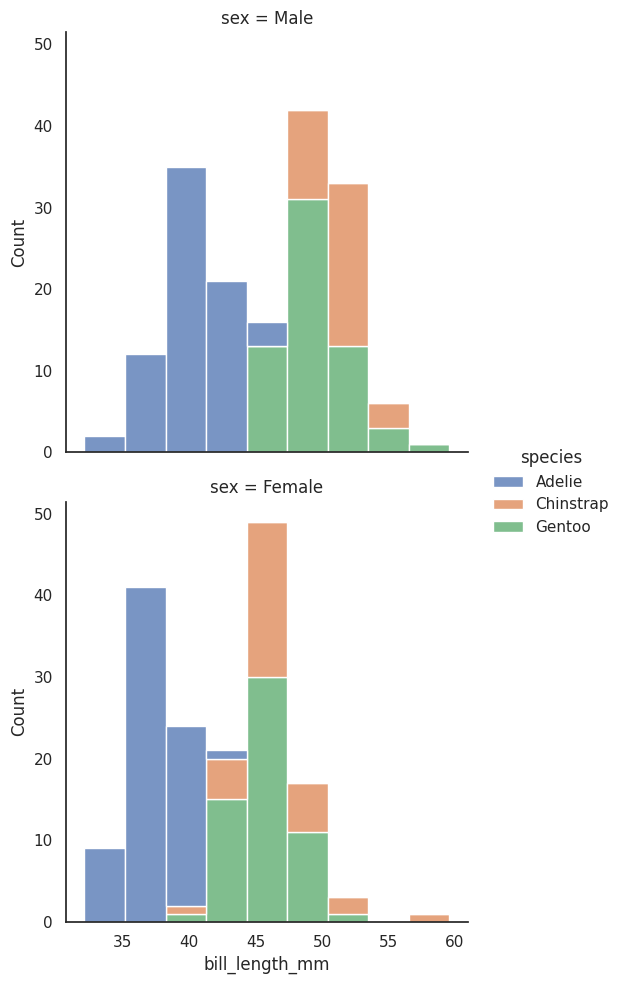

In [38]:
sns.displot(data, x="bill_length_mm", row="sex", hue="species",
                  binwidth=3, multiple="stack", )

In [39]:
sns.displot(data, x="bill_length_mm", col="sex", hue="species",
                  binwidth=3, multiple="stack", )

In [78]:
sns.set_theme(style="whitegrid", context="paper",)
sns.displot(data, x="bill_length_mm", col="sex", hue="species", row="island",
                  binwidth=3, multiple="stack", )

However, much like with the pyplot ijnterface, there are certain disadvantages to working this way: you cannot control fine-level settings, such as figure size.

We'll look at how to manually control this in a later session.

We can also control the aethetics by changing the colour pallete:

In [45]:
sns.set_theme(palette="flare")

fig, ax = plt.subplots()
sns.histplot(data, x="bill_length_mm", hue="species", ax=ax, kde=True,
             multiple="stack", element="step",)

<Axes: xlabel='bill_length_mm', ylabel='Count'>

In [47]:
# we can improve the appearance by scaling the colour map better
pal = sns.color_palette("flare",3)

sns.set_theme(palette=pal, style="ticks")

fig, ax = plt.subplots()
sns.histplot(data, x="bill_length_mm", hue="species", ax=ax, kde=True,
             multiple="stack", element="step",)

<Axes: xlabel='bill_length_mm', ylabel='Count'>

<Axes: xlabel='bill_length_mm', ylabel='Count'>

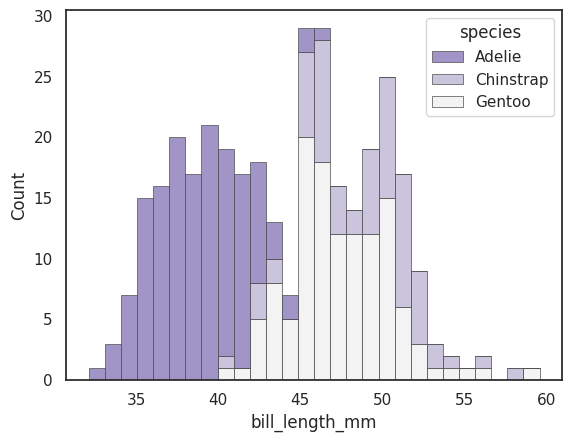

In [53]:
# You can also set the palette on a plot-specific basis
# you can also edit bar edge colour and linewidth

sns.set_theme(style="white")

fig, ax = plt.subplots()
sns.histplot(data, x="bill_length_mm", hue="species", ax=ax,
             binwidth=1,
             multiple="stack",
             palette="light:m_r",
             edgecolor=".3",
             linewidth=.5,)

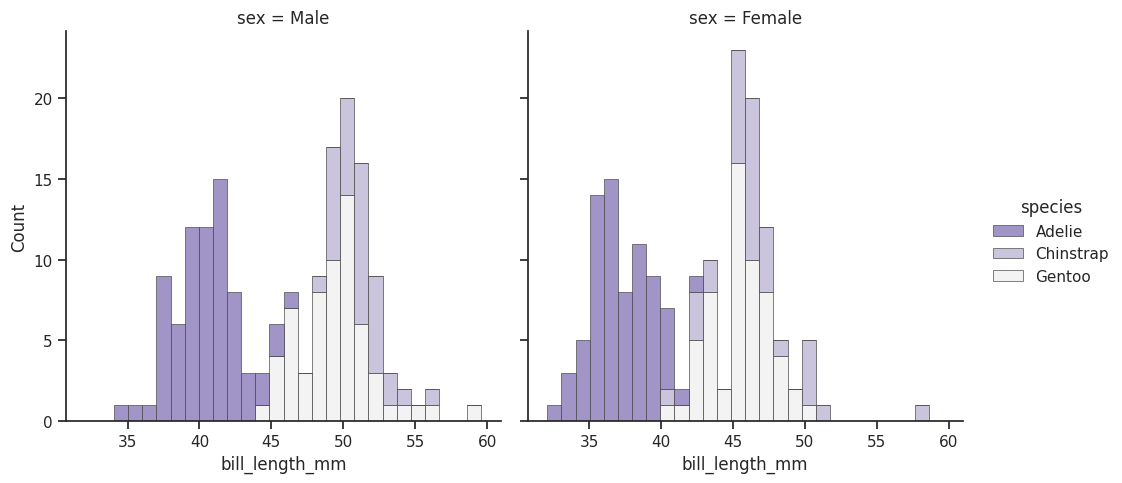

In [54]:
pal = sns.color_palette("flare",3)
sns.set_theme(palette=pal, style="ticks")

sns.displot(data, x="bill_length_mm", col="sex", hue="species",
                binwidth=1,
                multiple="stack",
                palette="light:m_r",
                edgecolor=".3",
                linewidth=.5,)

> What's an issue with the choice of colourmaps in these examples?

## Recreating similar plots with different libraries

We discussed some other plotting libraries earlier; let's have a look at one of these now and see how it handles the task of building a histogram.

We are going to use the Plotly Express interface in the Plotly library - this is sort of similar to Matplotlib's pyplot interface, in that it is a simplified, high-level way of creating figures, but obscures more in-depth settings and functionality.

-[Plotly express histogram docs](https://plotly.com/python-api-reference/generated/plotly.express.histogram)

In [55]:
# import required libraries

import plotly.express as px

In [61]:
fig = px.histogram(data, x="bill_length_mm")

# we need to include this for it to render:
fig.show()

In [63]:
# we can't specify bin width, but like seaborn, we can specify the number of bins
fig = px.histogram(data, x="bill_length_mm", nbins=100)
fig.show()

In [65]:
# we can't specify bin width, but like seaborn, we can specify the number of bins
fig = px.histogram(data, x="bill_length_mm", nbins=100,
                   color="species")
fig.show()

One of the key benefits of Plotly is it easily enables interactivity, without any effort or time spent designing a UI.

---

One final library we'll look at in this section is [Plotnine](https://plotnine.org/). This library has a very different approach to the libraries we looked at previously: plotnine is inspired by the ggplot library for R and implements the same logic used in that library to develop it's plots.

Let's try to plot the same histogram using this library.

- [Plotnine histogram](https://plotnine.org/reference/geom_histogram.html#basic-histogram)

As in R, we need to map on aesthetic layers, and geometry layers (denotes aes and geom)


In [70]:
# import the library

import plotnine

# we're going to continue using our penguins dataset

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


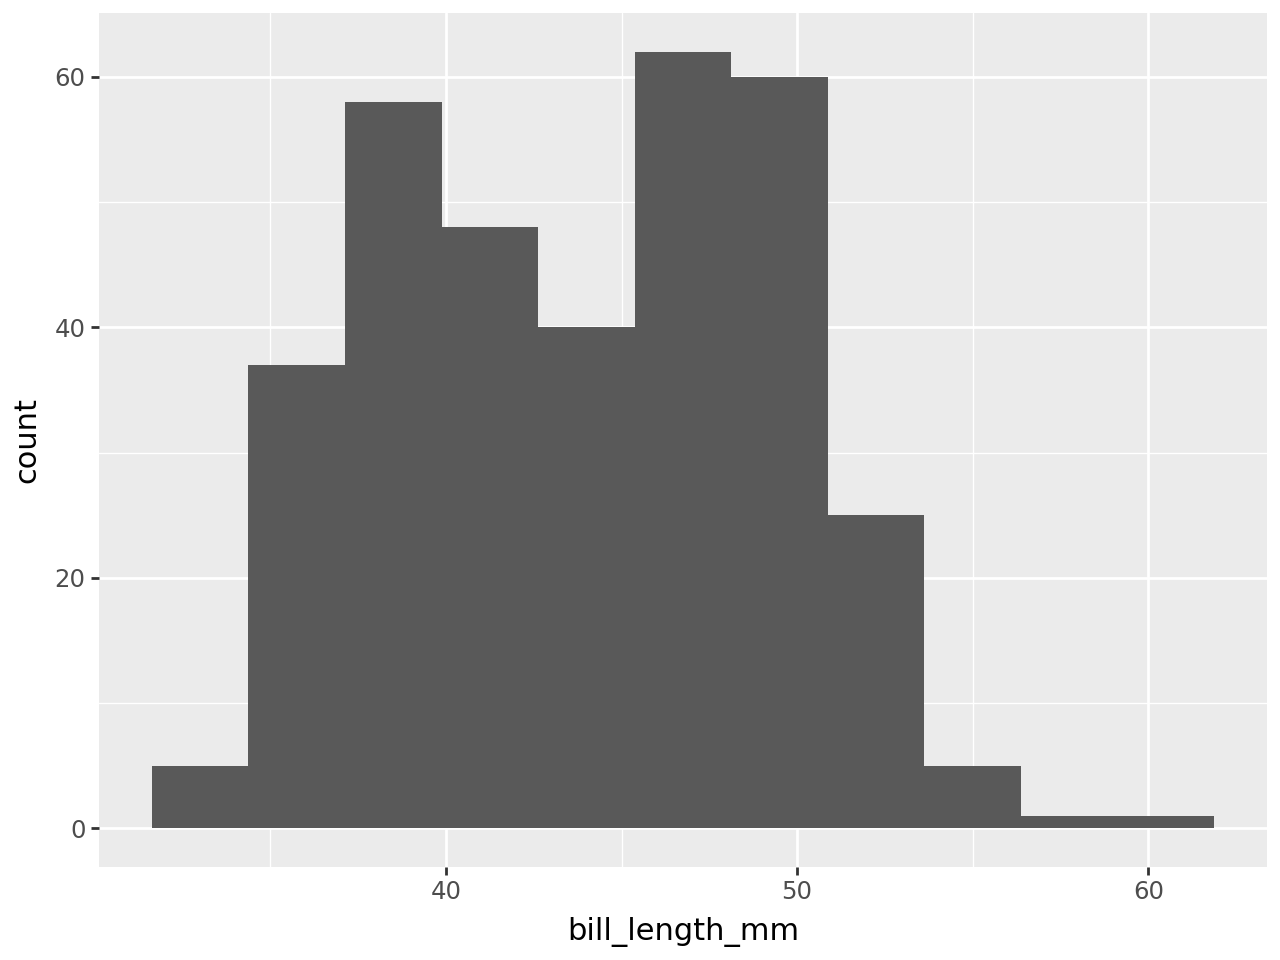

In [73]:
plotnine.ggplot(data,
                plotnine.aes(x="bill_length_mm")) + plotnine.geom_histogram()

This syntax might look somewhat familiar if you've previously used R, or it might be very unintuitive if you've only used Python.

We're not going to focus on this package today except to highlight its existence if you are more comfortable with R's "grammar of graphics".

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


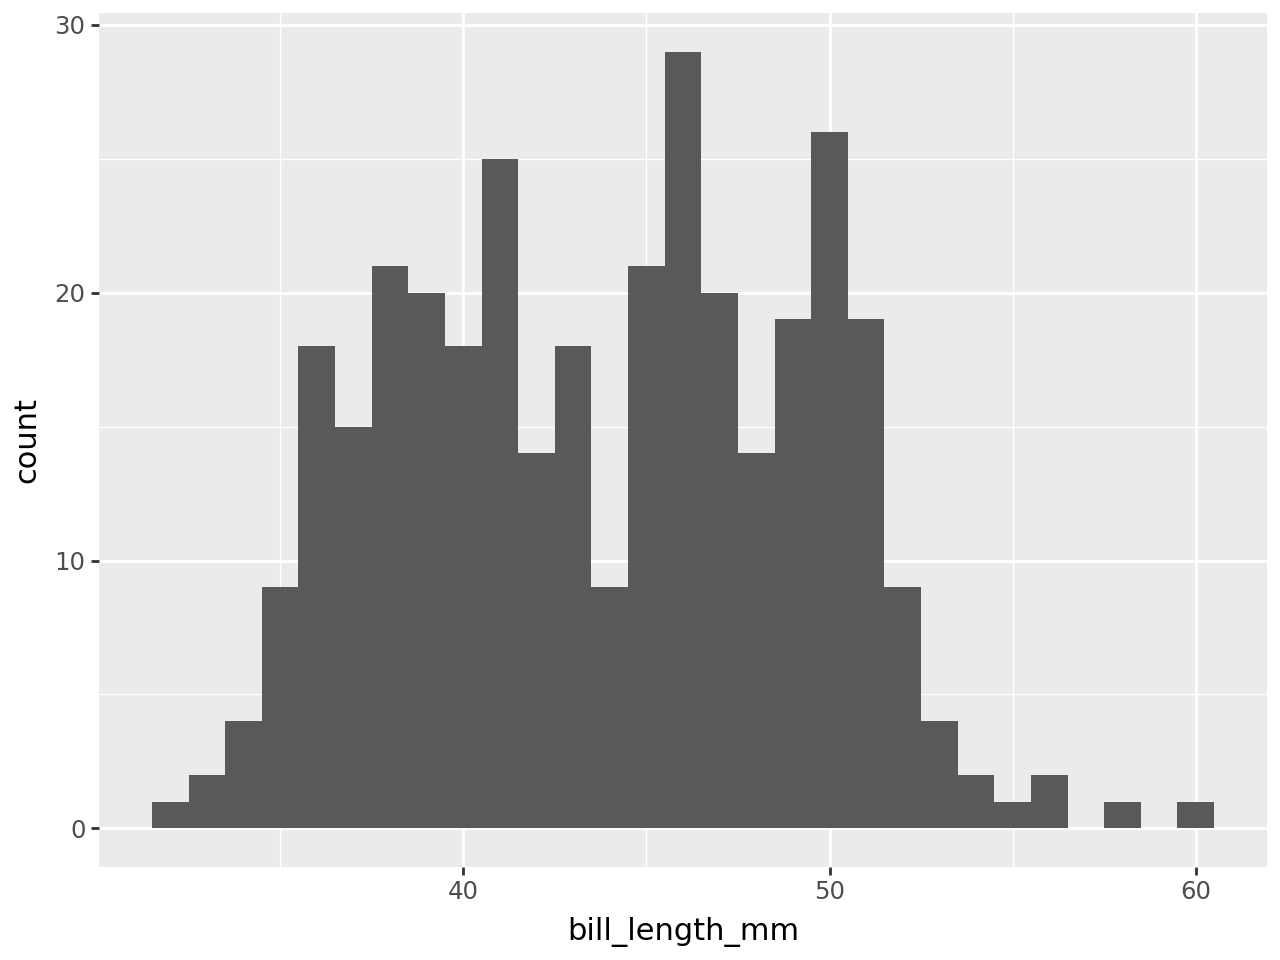

In [75]:
plotnine.ggplot(data,
                plotnine.aes(
                    x="bill_length_mm")) + plotnine.geom_histogram(binwidth=1)

As with seaborn, Plotnine can be used to build a faceted grid. We'll look at more multi-panelled plots later in the course.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 2 rows containing non-finite values.


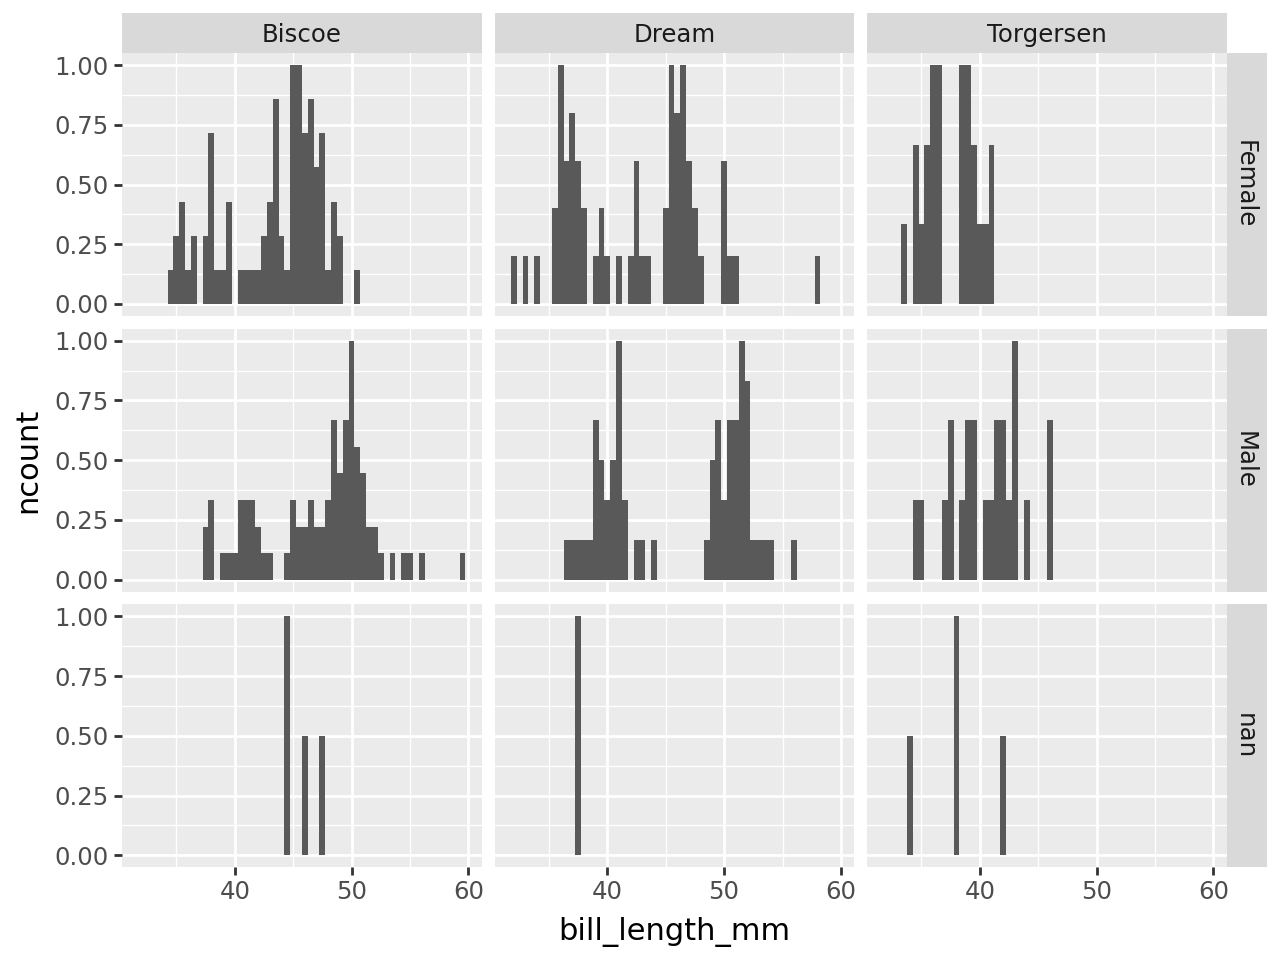

In [76]:
plotnine.ggplot(data, plotnine.aes(x="bill_length_mm", y=plotnine.after_stat("ncount"))) \
    + plotnine.geom_histogram(binwidth=0.5) \
    + plotnine.facet_grid("sex", "island")